<a href="https://colab.research.google.com/github/Marshal9158/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("creditcard_clean.csv")


Saving creditcard_clean.csv to creditcard_clean.csv


In [ ]:
print(df.info())
print(df.describe())
print(df['Class'].value_counts())  # assuming 'Class' is the target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


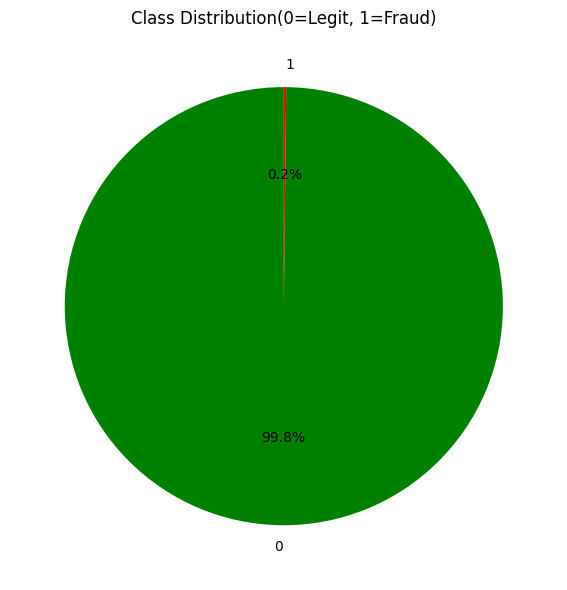

In [ ]:
class_counts = y.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels= class_counts.index, autopct='%1.1f%%', startangle=90,colors= ['green','red'])
plt.title('Class Distribution(0=Legit, 1=Fraud)')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=150)
plt.show()

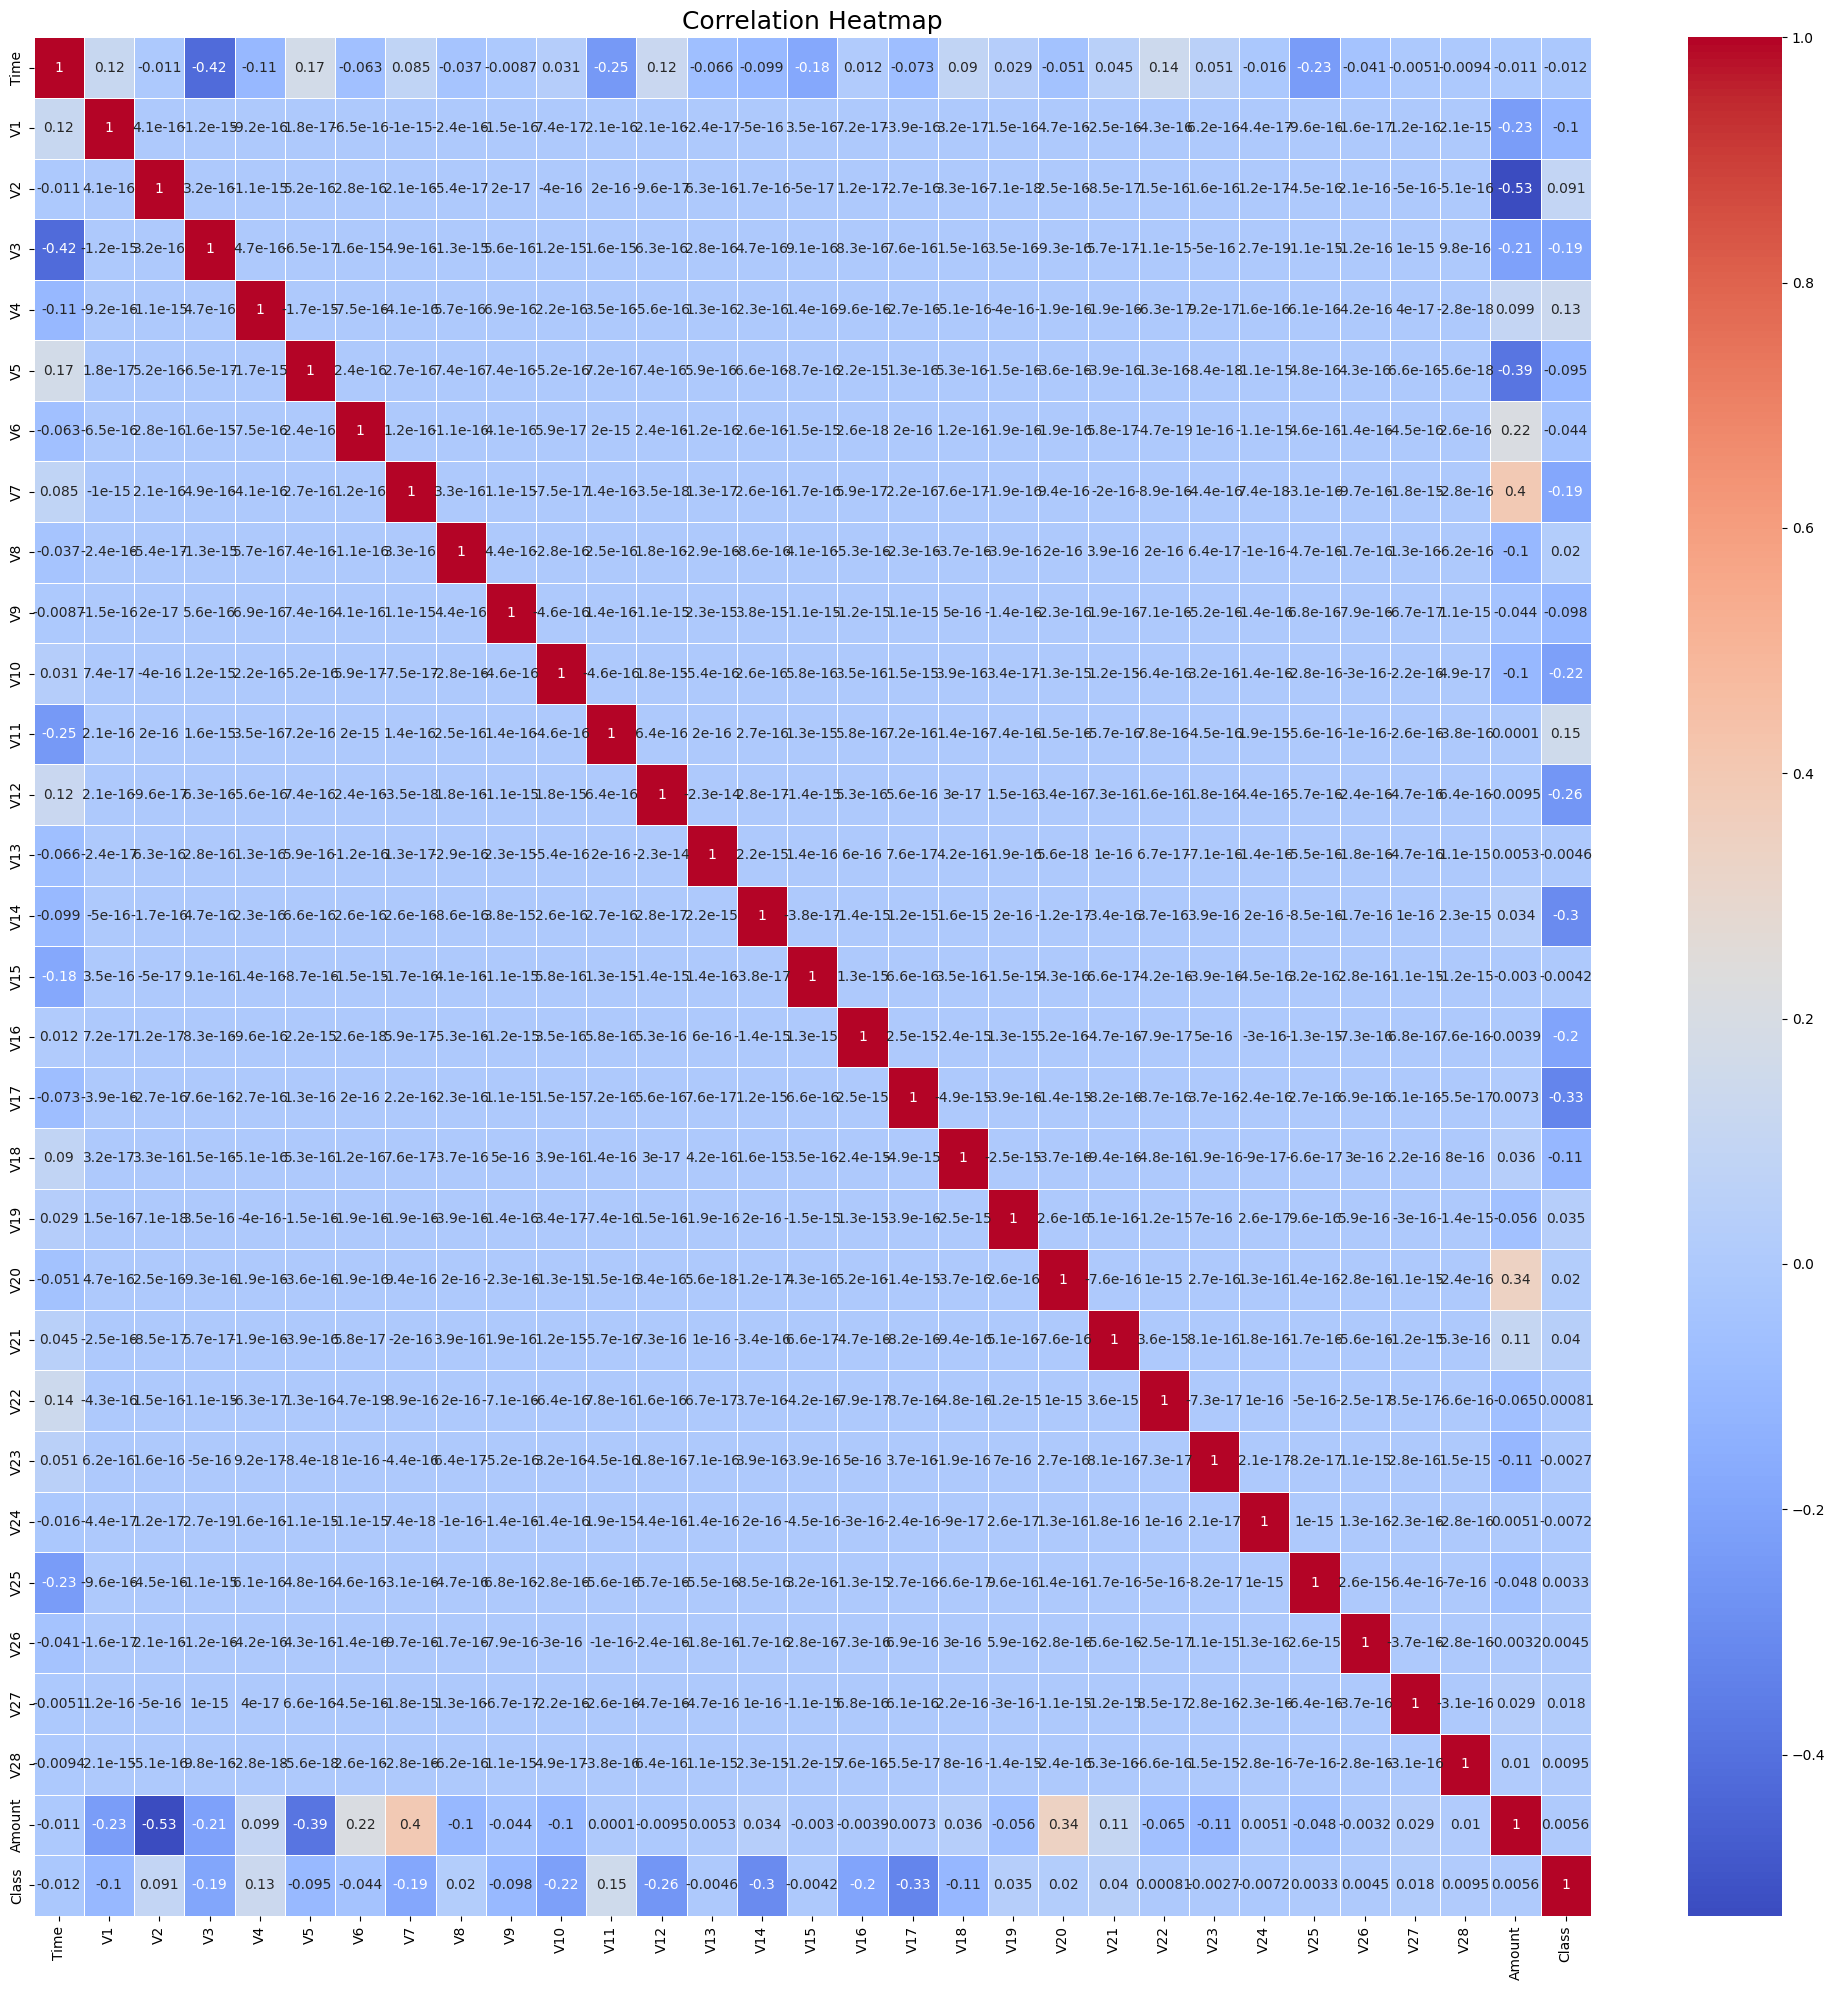

In [ ]:
plt.figure(figsize=(20,20))
correlation = df.corr()
sns.heatmap(correlation,annot=True, cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('rf', RandomForestClassifier(n_estimators= 100,random_state=42))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
rf_results = cross_validate(rf_pipeline, X_train, y_train, cv=skf, scoring=scoring)
print("Accuracy:", rf_results['test_accuracy'].mean())
print("Precision:", rf_results['test_precision'].mean())
print("Recall:", rf_results['test_recall'].mean())
print("F1 Score:", rf_results['test_f1'].mean())
print("ROC AUC Score:", rf_results['test_roc_auc'].mean())
print("PR Score:", rf_results['test_average_precision'].mean())

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)


Accuracy: 0.999495270907854
Precision: 0.8877786359847752
Recall: 0.8123012009087958
F1 Score: 0.8472629593987101
ROC AUC Score: 0.9689907750707587
PR Score: 0.842195606461088


In [ ]:
from sklearn.metrics import average_precision_score

results = {}
report = classification_report(y_test, y_pred_rf, output_dict=True)
results["Random Forest"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1 Score": report["1"]["f1-score"],
    "ROC AUC Score": roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:,1]),
    "PR Score": average_precision_score(y_test, rf_pipeline.predict_proba(X_test)[:,1])
}

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:,1]))
print("PR Score:", average_precision_score(y_test, rf_pipeline.predict_proba(X_test)[:,1]))


Accuracy: 0.999403110845827
Confusion Matrix:
 [[56847    17]
 [   17    81]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9644234399584257
PR Score: 0.8740809794187884


In [ ]:
from sklearn.linear_model import LogisticRegression

log_pipeline = Pipeline([('smote', SMOTE(random_state =42)),('scaler', StandardScaler()),('lgr', LogisticRegression(max_iter=3000, C= 1,solver = 'saga',random_state=42))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
log_results = cross_validate(log_pipeline, X_train, y_train, cv=skf, scoring=scoring)

print("Cross validation scores:")
print("Accuracy:", log_results['test_accuracy'].mean())
print("Precision:", log_results['test_precision'].mean())
print("Recall:", log_results['test_recall'].mean())
print("F1 Score:", log_results['test_f1'].mean())
print("ROC AUC scores:", log_results['test_roc_auc'].mean())
print("PR scores:", log_results['test_average_precision'].mean())

log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_test)

Cross validation scores:
Accuracy: 0.9902960345849152
Precision: 0.14013504382380698
Recall: 0.8909769555339176
F1 Score: 0.24190408622229714
ROC AUC scores: 0.9813546819171405
PR scores: 0.7595006500589303


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

report = classification_report(y_test, y_pred_log, output_dict=True)
results["Logistic Regression"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1 Score": report["1"]["f1-score"],
    "ROC AUC Score": roc_auc_score(y_test, log_pipeline.predict_proba(X_test)[:,1]),
    "PR Score": average_precision_score(y_test, log_pipeline.predict_proba(X_test)[:,1])
}

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, log_pipeline.predict_proba(X_test)[:,1]))
print("PR Score:", average_precision_score(y_test, log_pipeline.predict_proba(X_test)[:,1]))



Accuracy: 0.9898002176889856
Confusion Matrix:
 [[56293   571]
 [   10    88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.90      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962

ROC AUC Score: 0.9768442319949928
PR Score: 0.7331620099941094


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([('smote', SMOTE(random_state=42)),('scaler', StandardScaler()),('KNN', KNeighborsClassifier(n_neighbors=5,weights='distance'))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
knn_results = cross_validate(knn_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring=scoring)

print("Cross validation scores:")
print("Accuracy:", knn_results['test_accuracy'].mean())
print("Precision:", knn_results['test_precision'].mean())
print("Recall:", knn_results['test_recall'].mean())
print("F1 Score:", knn_results['test_f1'].mean())
print("ROC AUC scores:", knn_results['test_roc_auc'].mean())
print("PR scores:", knn_results['test_average_precision'].mean())
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)


Cross validation scores:
Accuracy: 0.9982839210867036
Precision: 0.5047244571865562
Recall: 0.7916910094125283
F1 Score: 0.6156274271689428
ROC AUC scores: 0.9055584275675563
PR scores: 0.6032417776923149


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

report = classification_report(y_test, y_pred_knn, output_dict=True)
results["K-Nearest Neighbors"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1 Score": report["1"]["f1-score"],
    "ROC AUC Score": roc_auc_score(y_test, knn_pipeline.predict_proba(X_test)[:,1]),
    "PR Score": average_precision_score(y_test, knn_pipeline.predict_proba(X_test)[:,1])
}

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, knn_pipeline.predict_proba(X_test)[:,1]))
print("PR Score:", average_precision_score(y_test, knn_pipeline.predict_proba(X_test)[:,1]))




Accuracy: 0.998156665847407
Confusion Matrix:
 [[56775    89]
 [   16    82]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.48      0.84      0.61        98

    accuracy                           1.00     56962
   macro avg       0.74      0.92      0.80     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9178978235216428
PR Score: 0.6080732230054627


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([('smote', SMOTE(random_state=42)), ('dt',DecisionTreeClassifier(max_depth=20, min_samples_split=30, min_samples_leaf=20,random_state=42))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
tree_results = cross_validate(tree_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring=scoring)
print("Cross validation scores:")
print("Accuracy:", tree_results['test_accuracy'].mean())
print("Precision:", tree_results['test_precision'].mean())
print("Recall:", tree_results['test_recall'].mean())
print("F1 Score:", tree_results['test_f1'].mean())
print("ROC AUC scores:", tree_results['test_roc_auc'].mean())
print("PR scores:", tree_results['test_average_precision'].mean())

tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

Cross validation scores:
Accuracy: 0.9956198292698983
Precision: 0.2596470736182973
Recall: 0.8222005842259007
F1 Score: 0.3942926793361037
ROC AUC scores: 0.9247070803268789
PR scores: 0.47552549853438564


In [ ]:
report = classification_report(y_test, y_pred_tree, output_dict=True)
results["Decision Tree"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1 Score": report["1"]["f1-score"],
    "ROC AUC Score": roc_auc_score(y_test, tree_pipeline.predict_proba(X_test)[:,1]),
    "PR Score": average_precision_score(y_test, tree_pipeline.predict_proba(X_test)[:,1])
}

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification report:\n", classification_report(y_test, y_pred_tree))
print("ROC AUC Score:", roc_auc_score(y_test, tree_pipeline.predict_proba(X_test)[:,1]))
print("PR Score:", average_precision_score(y_test, tree_pipeline.predict_proba(X_test)[:,1]))

Accuracy: 0.9958568870475053
Confusion matrix:
 [[56642   222]
 [   14    84]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.86      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.93      0.71     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9322159100697115
PR Score: 0.4821333005561677


In [ ]:
from xgboost import XGBClassifier

xgb_pipeline = Pipeline([('smote', SMOTE(random_state=42)),('xgb',XGBClassifier(n_estimators=100, max_depth=5,random_state=42))])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']
xgb_results = cross_validate(xgb_pipeline, X_train, y_train, cv=StratifiedKFold(n_splits=5), scoring=scoring)
print("Cross validation scores:")
print("Accuracy:", xgb_results['test_accuracy'].mean())
print("Precision:", xgb_results['test_precision'].mean())
print("Recall:", xgb_results['test_recall'].mean())
print("F1 Score:", xgb_results['test_f1'].mean())
print("ROC AUC scores:", xgb_results['test_roc_auc'].mean())
print("PR scores:", xgb_results['test_average_precision'].mean())

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

Cross validation scores:
Accuracy: 0.9993548245517786
Precision: 0.8110832968423101
Recall: 0.824732229795521
F1 Score: 0.81623185427911
ROC AUC scores: 0.9772173962343356
PR scores: 0.8449168217289103


In [ ]:
report = classification_report(y_test, y_pred_xgb, output_dict=True)
results["XGBoost"] = {
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1 Score": report["1"]["f1-score"],
    "ROC AUC Score": roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:,1]),
    "PR Score": average_precision_score(y_test, xgb_pipeline.predict_proba(X_test)[:,1])
}

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, xgb_pipeline.predict_proba(X_test)[:,1]))
print("PR Score:", average_precision_score(y_test, xgb_pipeline.predict_proba(X_test)[:,1]))

Accuracy: 0.9992099996488887
Confusion matrix:
 [[56833    31]
 [   14    84]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.86      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9818873244289275
PR Score: 0.8706326851297433


In [ ]:
df_results = pd.DataFrame(results).T
df_results.to_csv('model_results.csv')
print(df_results)

                     Accuracy  Precision    Recall  F1 Score  ROC AUC Score  \
Random Forest        0.999403   0.826531  0.826531  0.826531       0.964423   
Logistic Regression  0.989800   0.133536  0.897959  0.232497       0.976844   
K-Nearest Neighbors  0.998157   0.479532  0.836735  0.609665       0.917898   
Decision Tree        0.995857   0.274510  0.857143  0.415842       0.932216   
XGBoost              0.999210   0.730435  0.857143  0.788732       0.981887   

                     PR Score  
Random Forest        0.874081  
Logistic Regression  0.733162  
K-Nearest Neighbors  0.608073  
Decision Tree        0.482133  
XGBoost              0.870633  


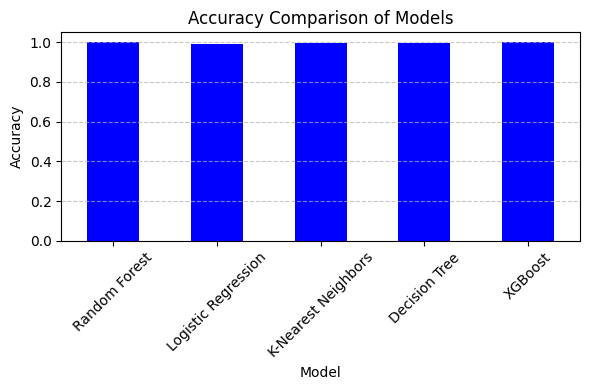

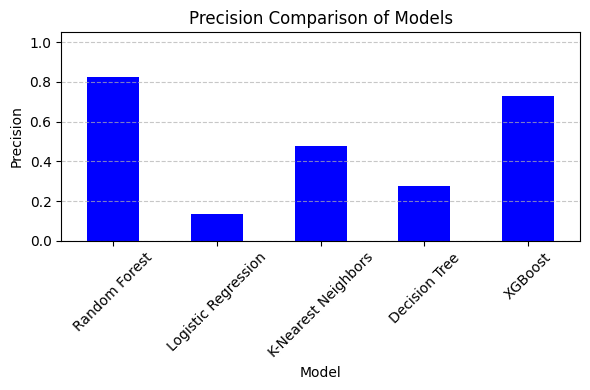

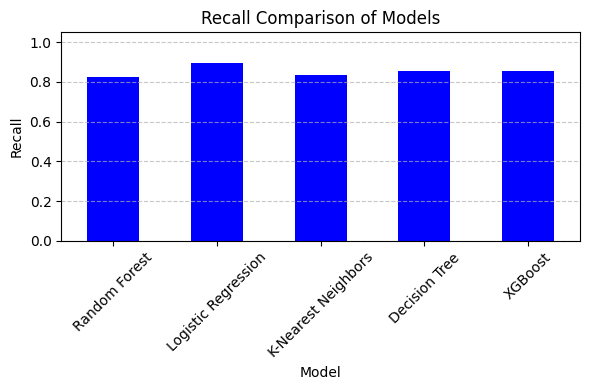

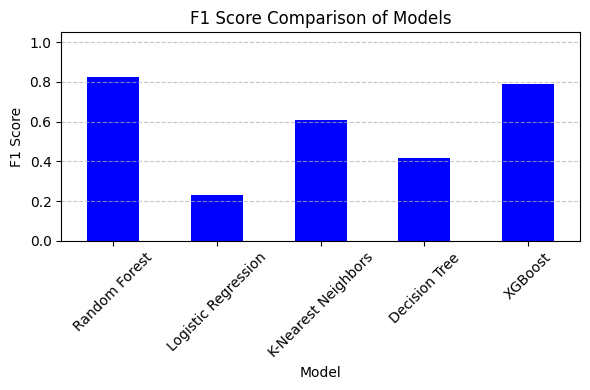

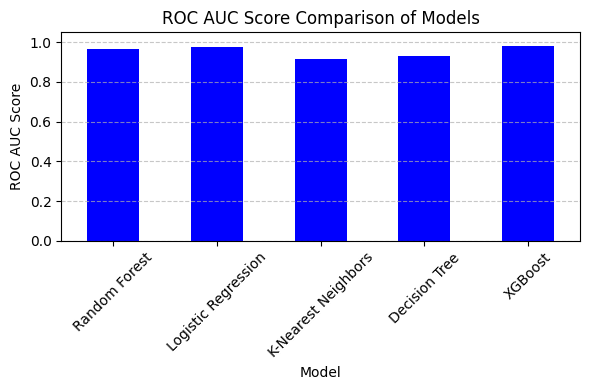

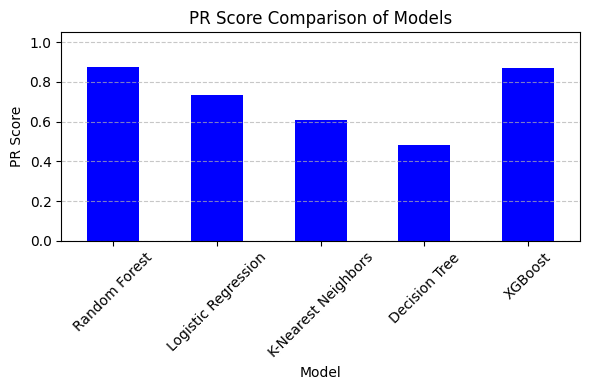

In [ ]:
metrics = df_results.columns

for metric in metrics:
  plt.figure(figsize=(6,4))
  df_results[metric].plot(kind='bar', color= 'blue')
  plt.title(f"{metric} Comparison of Models")
  plt.xlabel("Model")
  plt.ylabel(metric)
  plt.xticks(rotation=45)
  plt.ylim(0, 1.05)
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.tight_layout()
  plt.savefig(f"{metric}_comparison.png", dpi= 150)
  plt.show()

In [ ]:
import joblib
joblib.dump(rf_pipeline, 'credit_card_fraud_detection_model.pkl')
from google.colab import files
files.download('credit_card_fraud_detection_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>